# **Pilpres 2024 di Mata Netizen: Mengklasterisasi Reaksi Publik terhadap Kemenangan Paslon 02 dengan Pemodelan Topik berbasis LDA pada Platform Media Sosial Twitter**

## **Pendahuluan**
Pemilihan Presiden (Pilpres) 2024 menandai kemenangan Prabowo Subianto dan Gibran Rakabuming Raka dengan 96.214.691 suara [1]. Di era digital, media sosial seperti Twitter menjadi platform utama bagi masyarakat untuk berbagi pendapat dan preferensi politik. Pilpres 2024 dianggap sebagai momen penting dalam politik Indonesia. Penelitian ini bertujuan menganalisis konten Twitter untuk melihat reaksi pengguna terhadap kemenangan pasangan calon nomor urut 02 pada Pilpres 2024 dengan menggunakan pemodelan topik. Algoritma pemodelan topik, yang merupakan unsupervised learning, menghasilkan koleksi frasa dan kata yang saling berhubungan, yang kemudian diklasifikasikan oleh peneliti [2]. Metode yang digunakan untuk pemodelan topik pada penelitian ini adalah *Latent Dirichlet Allocation* (LDA), yang unggul dalam mengklasterkan data berukuran besar serta dapat diterapkan untuk mengidentifikasi topik dalam jurnal ilmiah, klasifikasi, dan pengelompokan [3].

## **Data**
*   Dataset yang digunakan dalam penelitian ini berasal dari media sosial Twitter.
*   Data dikumpulkan menggunakan pustaka *Tweet-Harvest*, sebuah proyek yang dikembangkan oleh Helmi Satria [4].
*   Pengumpulan data dilakukan berdasarkan kata kunci yang ditentukan oleh peneliti. Kata kunci yang digunakan dalam penelitian ini adalah "kemenangan prabowo-gibran", dengan rentang waktu dari 20 Maret 2024 hingga 20 Mei 2024, serta hanya mengambil teks berbahasa Indonesia.
*   Terdapat 3253 data yang berhasil dikumpulkan, dan setelah dilakukan pra-pemrosesan, jumlah data menjadi 2632.
*   Data yang dianalisis hanya data yang berisi tweet saja.

## **Metode**
*   Metode pemodelan topik yang digunakan dalam penelitian ini adalah *Latent Dirichlet Allocation* (LDA) dengan nilai alpha = “auto”.
*   Metrik evaluasi yang digunakan adalah *c_v coherence score*.



## **Data Crawling**

In [ ]:
# Twitter Auth Token
twitter_auth_token = 'YOUR_AUTH_TOKEN'

In [ ]:
# Menginstall package/module yang dibutuhkan
!pip install pandas
!pip install Sastrawi

# Install Node.js (karena tweet-harvest dibangun menggunakan Node.js)
!sudo apt-get update
!sudo apt-get install -y ca-certificates curl gnupg
!sudo mkdir -p /etc/apt/keyrings
!curl -fsSL https://deb.nodesource.com/gpgkey/nodesource-repo.gpg.key | sudo gpg --dearmor -o /etc/apt/keyrings/nodesource.gpg

!NODE_MAJOR=20 && echo "deb [signed-by=/etc/apt/keyrings/nodesource.gpg] https://deb.nodesource.com/node_$NODE_MAJOR.x nodistro main" | sudo tee /etc/apt/sources.list.d/nodesource.list

!sudo apt-get update
!sudo apt-get install nodejs -y

!node -v

In [ ]:
# Crawl Data (Research Purposes Only)

filename = 'Reaksi terhadap Kemenangan Paslon 02.csv' # Nama file csv yang akan disimpan
search_keyword = 'kemenangan prabowo-gibran lang:id since:2024-03-20 until:2024-05-20' # Data yang akan diambil berdasarkan kata kunci tertentu
limit = 5000 # Batasan jumlah data yang diambil

!npx -y tweet-harvest@2.6.1 -o "{filename}" -s "{search_keyword}" --tab "LATEST" -l {limit} --token {twitter_auth_token}

## **Text Preprocessing**

In [1]:
import pandas as pd # Import module yang dibutuhkan

# Link url data yang diupload di github
url = 'https://github.com/syahelrusfi21/Social-Media-Analysis---Topic-Modelling/raw/main/Reaksi_terhadap_Kemenangan_Paslon_02.csv'

# Membuka file CSV dalam bentuk pandas DataFrame
df = pd.read_csv(url)

# Cek jumlah data yang didapatkan
num_tweets = len(df)
print(f"Jumlah tweet dalam dataframe adalah {num_tweets}.")

# Menampilkan DataFrame
df.head(5)

Jumlah tweet dalam dataframe adalah 3253.


,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1792197008993976608,Sun May 19 14:13:59 +0000 2024,0,Tasyakuran Kemenangan Prabowo Gibran Papmiso G...,1792197008993976608,NaN,NaN,in,Cikarang Utara - Bekasi,0,1,0,https://x.com/_beritacikarang/status/179219700...,488963859,_beritacikarang
1,1792133425379578099,Sun May 19 10:01:19 +0000 2024,0,Calon Gubernur Aceh Muzakir Manaf meresmikan M...,1792133425379578099,https://pbs.twimg.com/media/GN7v2SqbUAAcesG.jpg,NaN,in,Kota Banda Aceh,0,0,1,https://x.com/acehkini/status/1792133425379578099,1095505508956422144,acehkini
2,1792077253204996593,Sun May 19 06:18:07 +0000 2024,0,TKD prabowo-Gibran Aceh Syukuran Kemenangan: T...,1792077253204996593,NaN,NaN,in,Indonesia,0,1,0,https://x.com/tempodotco/status/17920772532049...,18129942,tempodotco
3,1791758899881869613,Sat May 18 09:21:13 +0000 2024,6,@syahirularif Nah jàdi kemenangan Prabowo Gibr...,1791760946966503684,https://pbs.twimg.com/media/GN2dFfFbUAAZ3L9.jpg,syahirularif,in,NaN,1,1,0,https://x.com/165Hati/status/1791760946966503684,1752532657639165952,165Hati
4,1791685303230673397,Sat May 18 04:20:38 +0000 2024,1,Repnas mempercayai keadilan dan menilai kemena...,1791685303230673397,https://pbs.twimg.com/media/GN1YSGdbQAARajG.jpg,NaN,in,"Jambi, Indonesia",0,0,0,https://x.com/majunusantaraku/status/179168530...,1564217448697434112,majunusantaraku


In [2]:
# Selanjutnya kita hanya akan menganalisis teks (isi tweet) dalam DataFrame tersebut

# Mengakses kolom "full_text" yang berisi tweet
data  = pd.DataFrame(df[['full_text']])
print(data.shape) # Mencetak ukuran dimensi data
data.head(5) # Menampilkan 5 baris data pertama

(3253, 1)


,full_text
0,Tasyakuran Kemenangan Prabowo Gibran Papmiso G...
1,Calon Gubernur Aceh Muzakir Manaf meresmikan M...
2,TKD prabowo-Gibran Aceh Syukuran Kemenangan: T...
3,@syahirularif Nah jàdi kemenangan Prabowo Gibr...
4,Repnas mempercayai keadilan dan menilai kemena...


In [3]:
data.drop_duplicates(inplace=True) # Menghilangkan duplikasi data
data.shape # Melihat ukuran dimensi data

(3128, 1)

In [4]:
# Import module yang dibutuhkan
import re
import string
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

def tokenizing_text(text):
    text = re.sub(r'@[^\s]+', '', text) # Menghapus tag pengguna (username)
    text = re.sub(r'http\S+', '', text) # Menghapus tautan yang dimulai dengan 'http'
    text = re.sub(r'www\.\S+', '', text) # Menghapus tautan yang dimulai dengan 'www'
    text = re.sub(r'#\w+', '', text) # Menghapus hashtag
    text = re.sub(r'[^\w\s]', '', text) # Menghapus karakter tanda baca
    text = text.lower() # Mengubah teks menjadi lowercase (casefolding)
    text = word_tokenize(text) # Tokenisasi teks
    return text

data['tokenized_text'] = data['full_text'].apply(tokenizing_text) # Menerapkan fungsi tokenizing_text
print(data.shape) # Mencetak ukuran dimensi data
data.head(5) # Menampilkan 5 baris data pertama

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


(3128, 2)


,full_text,tokenized_text
0,Tasyakuran Kemenangan Prabowo Gibran Papmiso G...,"[tasyakuran, kemenangan, prabowo, gibran, papm..."
1,Calon Gubernur Aceh Muzakir Manaf meresmikan M...,"[calon, gubernur, aceh, muzakir, manaf, meresm..."
2,TKD prabowo-Gibran Aceh Syukuran Kemenangan: T...,"[tkd, prabowogibran, aceh, syukuran, kemenanga..."
3,@syahirularif Nah jàdi kemenangan Prabowo Gibr...,"[nah, jàdi, kemenangan, prabowo, gibran, malah..."
4,Repnas mempercayai keadilan dan menilai kemena...,"[repnas, mempercayai, keadilan, dan, menilai, ..."


In [5]:
# Import module yang dibutuhkan
import requests
from nltk.corpus import stopwords
nltk.download('stopwords')

# Menghapus stopwords
def remove_stopwords(tokens):
    # Membaca stopwords standar bahasa Indonesia dari NLTK
    stop_words = set(stopwords.words('indonesian'))

    # Fungsi untuk menambahkan stopwords dari URL mentah GitHub
    def add_stopwords_from_url(url):
        response = requests.get(url)
        extra_stopwords = response.text.splitlines()
        stop_words.update(extra_stopwords)

    url = 'https://github.com/syahelrusfi21/Social-Media-Analysis---Topic-Modelling/raw/main/stopwords_id.txt'

    # Tambahkan stopwords dari URL mentah
    add_stopwords_from_url(url)

    # # Menghapus stopwords
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens

data['cleaned_text'] = data['tokenized_text'].apply(remove_stopwords) # Menerapkan fungsi remove_stopwords
data # Menampilkan dataframe

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,full_text,tokenized_text,cleaned_text
0,Tasyakuran Kemenangan Prabowo Gibran Papmiso G...,"[tasyakuran, kemenangan, prabowo, gibran, papm...",[tasyakuran]
1,Calon Gubernur Aceh Muzakir Manaf meresmikan M...,"[calon, gubernur, aceh, muzakir, manaf, meresm...","[muzakir, manaf, meresmikan, mualem, bernaung,..."
2,TKD prabowo-Gibran Aceh Syukuran Kemenangan: T...,"[tkd, prabowogibran, aceh, syukuran, kemenanga...",[syukuran]
3,@syahirularif Nah jàdi kemenangan Prabowo Gibr...,"[nah, jàdi, kemenangan, prabowo, gibran, malah...","[kesengsaraan, warisan, ditinggal, jokowi]"
4,Repnas mempercayai keadilan dan menilai kemena...,"[repnas, mempercayai, keadilan, dan, menilai, ...","[mempercayai, keadilan]"
...,...,...,...
3248,Keputusan MK dan kemenangan Prabowo - Gibran j...,"[keputusan, mk, dan, kemenangan, prabowo, gibr...","[tertawaan, podcast, jiran]"
3249,Prabowo-Gibran Sapu Kemenangan Pilpres 2024 di...,"[prabowogibran, sapu, kemenangan, pilpres, 202...","[ganjar, pranowo, anies, jokowi, arena, transp..."
3250,@bengkeldodo @AlmaghribiS @alin_raihani @Alexe...,"[saat, ini, kemenangan, prabowo, gibran, didem...","[didemo, curang]"
3251,Prabowo-Gibran Sapu Kemenangan Pilpres 2024 di...,"[prabowogibran, sapu, kemenangan, pilpres, 202...",[]


In [6]:
# Fungsi untuk menghapus baris dimana terdapat kolom yang berisi list kosong
def remove_empty_lists(data, column):
    # Hapus baris di mana kolom berisi list kosong
    data = data[data[column].map(lambda x: not (isinstance(x, list) and len(x) == 0))]
    return data

# Terapkan fungsi ke DataFrame
cleaned_data = remove_empty_lists(data, 'cleaned_text') # Menerapkan fungsi remove_empty_lists
print(cleaned_data.shape) # Mencetak ukuran dimensi data
cleaned_data.head(5) # Menampilkan 5 baris data pertama

(2632, 3)


,full_text,tokenized_text,cleaned_text
0,Tasyakuran Kemenangan Prabowo Gibran Papmiso G...,"[tasyakuran, kemenangan, prabowo, gibran, papm...",[tasyakuran]
1,Calon Gubernur Aceh Muzakir Manaf meresmikan M...,"[calon, gubernur, aceh, muzakir, manaf, meresm...","[muzakir, manaf, meresmikan, mualem, bernaung,..."
2,TKD prabowo-Gibran Aceh Syukuran Kemenangan: T...,"[tkd, prabowogibran, aceh, syukuran, kemenanga...",[syukuran]
3,@syahirularif Nah jàdi kemenangan Prabowo Gibr...,"[nah, jàdi, kemenangan, prabowo, gibran, malah...","[kesengsaraan, warisan, ditinggal, jokowi]"
4,Repnas mempercayai keadilan dan menilai kemena...,"[repnas, mempercayai, keadilan, dan, menilai, ...","[mempercayai, keadilan]"


In [15]:
cleaned_data = pd.DataFrame(cleaned_data[['cleaned_text']]) # Mengambil hanya kolom cleaned_text
print(cleaned_data.shape) # Mencetak ukuran dimensi data
cleaned_data.head(5) # Menampilkan 5 baris data pertama

(2632, 1)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,cleaned_text
0,[tasyakuran]
1,"[muzakir, manaf, meresmikan, mualem, bernaung,..."
2,[syukuran]
3,"[kesengsaraan, warisan, ditinggal, jokowi]"
4,"[mempercayai, keadilan]"


In [16]:
# Menyimpan hasil preprocessing ke file CSV
cleaned_data.to_csv('cleaned_data.csv', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


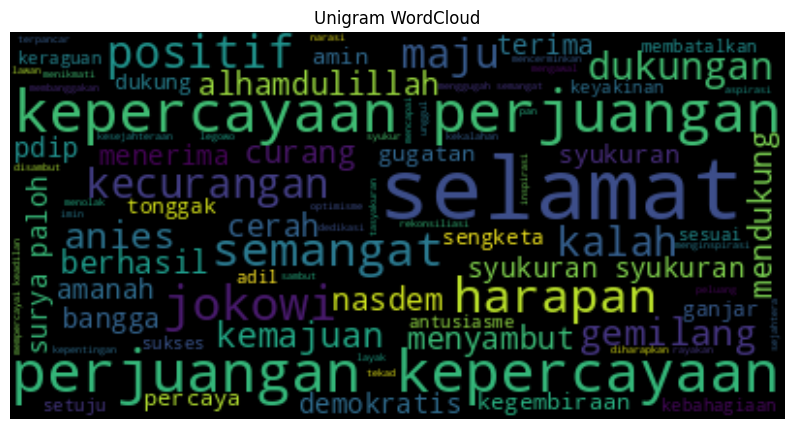

In [17]:
# Import module yang dibutuhkan
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Fungsi untuk membuat WordCloud dari unigram
def generate_unigram_wordcloud(text, max_words=100, title="WordCloud"):
    # Membuat WordCloud
    wordcloud = WordCloud(max_words=max_words).generate(text)

    # Menampilkan WordCloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(title)
    plt.axis("off")
    plt.show()

# Kolom pada DataFrame yang ingin digunakan untuk membuat WordCloud
column_name = 'cleaned_text'  # Ubah sesuai dengan nama kolom yang ingin digunakan

# Menggabungkan teks dari kolom DataFrame menjadi satu teks
text = ' '.join(cleaned_data[column_name].apply(lambda x: ' '.join(x)))

# Membuat WordCloud unigram
generate_unigram_wordcloud(text, max_words=100, title="Unigram WordCloud")

## **Pemodelan Topik** (***Topic Modelling***)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.096*"harapan" + 0.032*"cerah" + 0.019*"bersorak" + 0.018*"adil" + '
  '0.016*"maju" + 0.014*"disambut" + 0.014*"sukses" + 0.012*"impian" + '
  '0.011*"gembira" + 0.011*"tekad"'),
 (1,
  '0.156*"selamat" + 0.034*"anies" + 0.031*"berhasil" + 0.017*"nasdem" + '
  '0.013*"paloh" + 0.013*"menginspirasi" + 0.012*"surya" + 0.011*"dukungan" + '
  '0.011*"tasyakuran" + 0.010*"alhamdulillah"'),
 (2,
  '0.032*"maju" + 0.029*"semangat" + 0.028*"keyakinan" + 0.017*"jokowi" + '
  '0.015*"diharapkan" + 0.013*"mengubah" + 0.011*"optimisme" + '
  '0.010*"dedikasi" + 0.010*"sambut" + 0.010*"sorakan"'),
 (3,
  '0.142*"kepercayaan" + 0.081*"perjuangan" + 0.037*"syukuran" + '
  '0.025*"membanggakan" + 0.010*"inklusif" + 0.009*"mencerminkan" + '
  '0.009*"berkelanjutan" + 0.009*"keunggulan" + 0.008*"kasih" + '
  '0.008*"menggembirakan"'),
 (4,
  '0.068*"positif" + 0.054*"gemilang" + 0.044*"dukungan" + 0.029*"semangat" + '
  '0.022*"tonggak" + 0.017*"kegembiraan" + 0.017*"kalah" + 0.012*"ekonomi" +

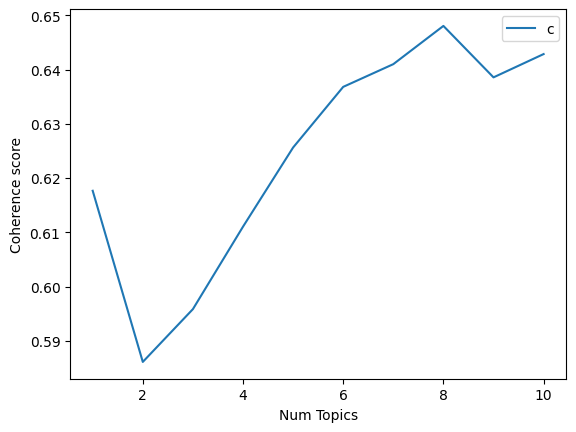

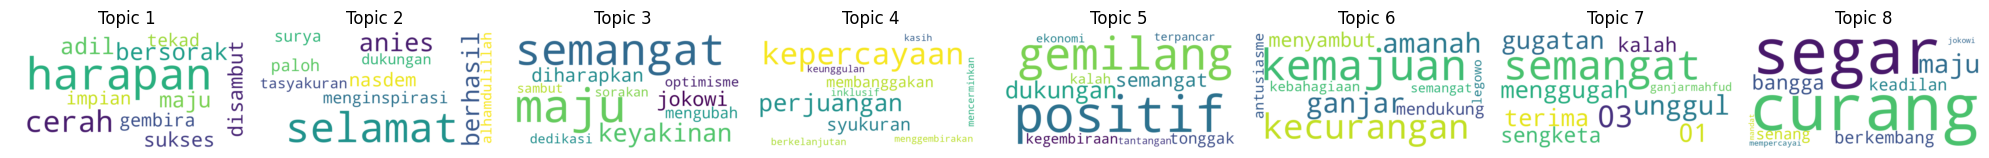

In [18]:
# Import module yang dibutuhkan
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
from gensim.utils import simple_preprocess
from gensim.models.ldamodel import LdaModel
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from pprint import pprint

def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary: Kamus Gensim yang berisi semua kata unik dalam korpus
    corpus: Korpus Gensim, representasi bag-of-words dari dokumen
    texts: Daftar teks input yang telah diproses (cleaned_text)
    limit: Jumlah maksimal topik yang akan diuji

    Returns:
    -------
    model_list: Daftar model LDA yang telah dilatih dengan berbagai jumlah topik
    coherence_values: Nilai koherensi yang sesuai dengan model LDA dengan jumlah topik tertentu
    """
    # Inisialisasi List untuk Menyimpan Hasil
    coherence_values = []
    model_list = []
    # Loop untuk Melatih Model LDA dengan Berbagai Jumlah Topik
    for num_topics in range(start, limit, step):
        # Melatih Model LDA
        lda_model = LdaModel(corpus=corpus,
                             id2word=dictionary,
                             num_topics=num_topics,
                             random_state=42,
                             passes=10,
                             alpha='auto',
                             per_word_topics=True)
        model_list.append(lda_model) # Menambahkan model LDA yang telah dilatih ke dalam model_list
        '''
        Membuat model koherensi CoherenceModel untuk model LDA yang telah dilatih dan menghitung nilai koherensi c_v.
        Nilai koherensi ini kemudian ditambahkan ke dalam coherence_values.
        '''
        coherencemodel = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    # Mengembalikan daftar model LDA (model_list) dan nilai koherensi yang sesuai (coherence_values)
    return model_list, coherence_values

# Membuat dictionary
id2word = corpora.Dictionary(cleaned_data['cleaned_text'])

# Membuat Corpus
texts = cleaned_data['cleaned_text']

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# Definisikan search parameters
start = 1
limit = 11
step = 1

# Menjalankan iterasi dan menghitung coherence score
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=start, limit=limit, step=step)

# Menemukan model dengan coherence score tertinggi
optimal_model_index = coherence_values.index(max(coherence_values))
optimal_model = model_list[optimal_model_index]

# Mencetak topik-topik dari model yang optimal
pprint(optimal_model.print_topics())

# Evaluasi model menggunakan coherence score
print('Coherence Score: ', max(coherence_values))

# Membuat grafik coherence score terhadap jumlah topik
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# Fungsi untuk membuat wordcloud dari topik
def generate_wordcloud(topic_words):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_words)
    return wordcloud

# Ekstrak topik dan kata-kata
topics = optimal_model.show_topics(num_words=10, formatted=False)
topic_words = {i: dict(words) for i, words in topics}

# Membuat wordcloud untuk setiap topik
wordclouds = [generate_wordcloud(topic_words[i]) for i in topic_words]

# Tampilkan wordcloud menggunakan matplotlib
fig, axes = plt.subplots(1, len(wordclouds), figsize=(20, 10))
for i, ax in enumerate(axes):
    ax.imshow(wordclouds[i], interpolation='bilinear')
    ax.axis('off')
    ax.set_title(f'Topic {i+1}')

plt.tight_layout()
plt.show()


In [19]:
!pip install pyLDAvis # Menginstall module pyLDAvis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
# Import module yang dibutuhkan
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

# Mengaktifkan mode notebook untuk pyLDAvis, yang memungkinkan visualisasi ditampilkan langsung dalam notebook Jupyter (google colab)
pyLDAvis.enable_notebook()

# Mempersiapkan visualisasi
lda_display = gensimvis.prepare(optimal_model, corpus, id2word, sort_topics=False)

# Menampilkan visualisasi LDAViz
pyLDAvis.display(lda_display)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## **Interpretasi dan Kesimpulan**

Dari hasil percobaan yang dilakukan dalam penelitian ini, kami menentukan delapan topik dalam pemodelan topik berbasis LDA. Terlihat bahwa reaksi masyarakat di media sosial Twitter terhadap kemenangan Prabowo-Gibran pada pilpres 2024 cukup menarik. Dari pemodelan topik menggunakan data Twitter ini, kita dapat mengungkap hal-hal yang mungkin saja belum disebarluaskan oleh media televisi.

Dari sini, kita dapat interpretasikan bahwa topik pertama mencakup kata-kata seperti "harapan", "cerah", "bersorak", "adil", "maju", "disambut", "sukses", "impian", dan "tekad". Ini mengindikasikan sebuah topik yang berfokus pada aspirasi positif, harapan, dan optimisme terhadap kemajuan di masa depan, serta semangat untuk mencapai tujuan yang dianggap berarti dan adil.

Topik kedua memuat kata-kata seperti "selamat", "anies", "berhasil", "nasdem", "paloh", "menginspirasi", "surya", "dukungan", dan "tasyakuran". Ini mengindikasikan topik tentang inspirasi dan dukungan yang berkaitan dengan Partai Nasdem, Anies Baswedan, dan Surya Paloh.

Topik ketiga memuat kata-kata seperti "maju", "semangat", "keyakinan", "jokowi", "diharapkan", "mengubah", "optimisme", "dedikasi", dan "sambut". Hal ini mengindikasikan topik yang berfokus pada semangat untuk maju, keyakinan dalam perubahan positif, serta Jokowi yang diharapkan mampu membawa perubahan yang lebih baik.

Topik keempat memuat kata-kata seperti "kepercayaan", "perjuangan", "syukuran", "membanggakan", "inklusif", "berkelanjutan", "keunggulan", "kasih", dan "menggembirakan". Ini mengindikasikan topik yang membahas nilai-nilai kepercayaan, perjuangan untuk mencapai tujuan, serta penghargaan terhadap pencapaian yang membanggakan dan berkelanjutan.

Topik kelima memuat kata-kata seperti "positif", "gemilang", "dukungan", "semangat", "tonggak", "kegembiraan", "kalah", "ekonomi", dan "tantangan". Ini mengindikasikan topik yang berhubungan dengan evaluasi positif terhadap dukungan dan prestasi, serta tantangan-tantangan yang dihadapi dalam konteks tertentu.

Topik keenam memuat kata-kata seperti "kemajuan", "kecurangan", "ganjar", "amanah", "menyambut", "mendukung", "antusiasme", "kebahagiaan", dan "legowo". Ini mengindikasikan topik yang berfokus pada kelegowoan Ganjar Pranowo terhadap hasil keputusan pilpres 2024 walaupun terdapat indikasi kecurangan, serta dukungan dan antusiasme terhadap hasil keputusan yang ada.

Topik ketujuh memuat kata-kata seperti  "semangat", "03", "unggul", "01", "gugatan", "menggugah", "terima", "sengketa", "kalah", dan "ganjarmahfud". Ini mengindikasikan topik yang berkaitan dengan sengketa dan semangat untuk menggugat hasil keputusan Pilpres 2024.

Terakhir, topik kedelapan memuat kata-kata seperti "curang", "segar", "maju", "bangga", "berkembang", "keadilan", "senang", "mempercayai", "jokowi", dan "mandat". Ini mengindikasikan topik yang berhubungan dengan evaluasi terhadap keadilan, kebanggaan terhadap kemajuan atau prestasi, serta keyakinan terhadap pemimpin atau keputusan yang diberikan. Walaupun tidak dapat dipungkiri masih terdapat kecurangan.

Berdasarkan analisis dan pemodelan topik berbasis *Latent Dirichlet Allocation* (LDA) yang dilakukan, didapatkan 8 topik optimal dengan nilai koherensi sebesar 0.6480404285755261. Dari 8 topik tersebut, dapat disimpulkan bahwa reaksi masyarakat Indonesia yang tertuang di media sosial Twitter terhadap kemenangan Prabowo-Gibran pada Pilpres 2024, mayoritas memberikan reaksi positif, dukungan, dan harapan untuk kemajuan Indonesia di masa mendatang. Meskipun demikian, tidak dapat dipungkiri masih terdapat beberapa indikasi kecurangan yang memicu sengketa dan gugatan dari lawan politik pasangan calon tersebut.

## **Referensi**
[1] C. Indonesia, “Prabowo-Gibran Menang Pilpres 2024, Raih 96,2 Juta Suara,” CNN Indonesia. Accessed: Jun. 30, 2024. [Online]. Available: https://www.cnnindonesia.com/nasional/20240320184608-617-1076845/prabowo-gibran-menang-pilpres-2024-raih-962-juta-suara

[2] R. K. Gupta, R. Agarwalla, B. H. Naik, J. R. Evuri, A. Thapa, and T. D. Singh, “Prediction of Research Trends using LDA based Topic Modeling,” Glob. Transitions Proc., vol. 3, no. 1, pp. 298–304, 2022, doi: https://doi.org/10.1016/j.gltp.2022.03.015.

[3] S. A. Putri, P. D. Kusuma, and C. Setianingsih, “Clustering Topik pada Data Sentimen BPJS Kesehatan menggunakan Metode Latent Dirichlet Allocation,” e-Proceeding Eng., vol. 8, no. 5, pp. 6097–6105, 2021,

[4] H. Satria, “Cara Mendapatkan Data (Crawl) Twitter X - Maret 2024,” Helmi Satria Blog. Accessed: Jun. 20, 2024. [Online]. Available: https://helmisatria.com/blog/updated-crawl-data-twitter-x-maret-2024